In [22]:
# importing the required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

In [23]:
# Importing the dataset
df = pd.read_csv("phishing_dataset.csv")
df.pop("id")
df["Result"].replace(-1, 0, inplace=True)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [25]:
# Separating the data into X and y
logistic_df = df.copy(deep=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set, Validation set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

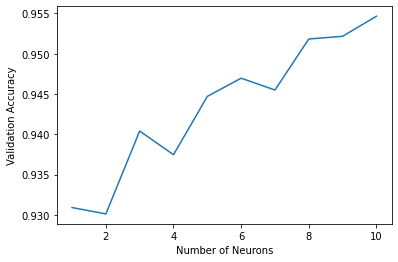

The best number of neurons is 10


In [27]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

validation_accuracy = []
for neurons in range(1, 11):
    accuracy = []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=[neurons], max_iter=1000, random_state=1, activation="logistic")
        clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        accuracy.append(accuracy_score(y_test_cv, y_pred))
    validation_accuracy.append(np.mean(accuracy))

plt.plot(range(1, 11), validation_accuracy)
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Accuracy")
plt.show()

# The best number of neurons
best_neurons = np.argmax(validation_accuracy) + 1
print("The best number of neurons is", best_neurons)

In [34]:
# Training the model with the best number of neurons
clf = MLPClassifier(hidden_layer_sizes=[best_neurons], max_iter=1000, random_state=1, activation="logistic")

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model with {best_neurons} neurons and 1 hidden layers is {accuracy*100}%.")

The accuracy of the model with 10 neurons and 1 hidden layers is 95.16056083220262%.


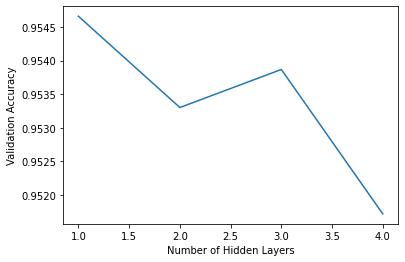

The best number of hidden layers is 1


In [32]:
validation_accuracy = []
for layers in range(1, 5):
    accuracy = []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=[best_neurons]*layers, max_iter=1000, random_state=1, activation="logistic")
        clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        accuracy.append(accuracy_score(y_test_cv, y_pred))
    validation_accuracy.append(np.mean(accuracy))

plt.plot(range(1, 5), validation_accuracy)
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Validation Accuracy")
plt.show()

# The best number of hidden layers
best_layers = np.argmax(validation_accuracy) + 1
print("The best number of hidden layers is", best_layers)

In [33]:
clf = MLPClassifier(hidden_layer_sizes=[best_neurons]*best_layers, max_iter=1000, random_state=1, activation="logistic")

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model with {best_neurons} neurons and {best_layers} hidden layers is {accuracy*100}%.")

The accuracy of the model with 10 neurons and 1 hidden layers is 95.16056083220262%.


With KFold cross validation, we have determined that using 1 hidden layers and 10 neurons each provided the best results. 

Our highest accuracy score at the end is 95.16056083220262%.

Note: This is achieved with logistic as the activation function. We will test other ReLU below.

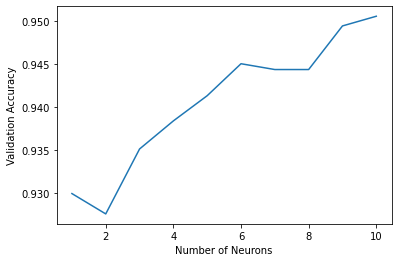

The best number of neurons is 10


In [35]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

validation_accuracy = []
for neurons in range(1, 11):
    accuracy = []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=[neurons], max_iter=1000, random_state=1, activation="relu")
        clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        accuracy.append(accuracy_score(y_test_cv, y_pred))
    validation_accuracy.append(np.mean(accuracy))

plt.plot(range(1, 11), validation_accuracy)
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Accuracy")
plt.show()

# The best number of neurons
best_neurons = np.argmax(validation_accuracy) + 1
print("The best number of neurons is", best_neurons)

In [36]:
# Training the model with the best number of neurons
clf = MLPClassifier(hidden_layer_sizes=[best_neurons], max_iter=1000, random_state=1, activation="relu")

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model with {best_neurons} neurons and 1 hidden layers is {accuracy*100}%.")

The accuracy of the model with 10 neurons and 1 hidden layers is 95.16056083220262%.


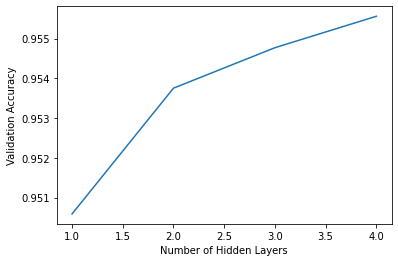

The best number of hidden layers is 4


In [37]:
validation_accuracy = []
for layers in range(1, 5):
    accuracy = []
    for train_index, test_index in kfold.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=[best_neurons]*layers, max_iter=1000, random_state=1, activation="relu")
        clf.fit(X_train_cv, y_train_cv)
        y_pred = clf.predict(X_test_cv)
        accuracy.append(accuracy_score(y_test_cv, y_pred))
    validation_accuracy.append(np.mean(accuracy))

plt.plot(range(1, 5), validation_accuracy)
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Validation Accuracy")
plt.show()

# The best number of hidden layers
best_layers = np.argmax(validation_accuracy) + 1
print("The best number of hidden layers is", best_layers)

In [38]:
clf = MLPClassifier(hidden_layer_sizes=[best_neurons]*best_layers, max_iter=1000, random_state=1, activation="relu")

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model with {best_neurons} neurons and {best_layers} hidden layers is {accuracy*100}%.")

The accuracy of the model with 10 neurons and 4 hidden layers is 95.79375848032564%.


Using ReLU as the activation function instead, we got an accuracy of 95.79375848032564%.

This was obtained with 10 neurons and 4 hidden layers.

Conclusion: The highest accuracy is 95.79375848032564% with a model that uses 4 hidden layers with 10 neurons each, and using ReLU as the activation function.